In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import re
from wordcloud import WordCloud , ImageColorGenerator
from collections import Counter

In [2]:
product_reviews = pd.read_csv('../Data/clean.csv')
train = pd.read_csv('../Data/Test-Train/train.csv')

# Ratings for the top 5 Brands

In [27]:
product_reviews['brandName'].value_counts().head(13)

Titan        200
Mamaearth    200
Cinthol      200
Godrej       200
Himalaya     200
Mysore       194
Streax       188
Society      182
Dettol       180
Tata         180
Patanjali    172
Amul         164
Fastrack     160
Name: brandName, dtype: int64

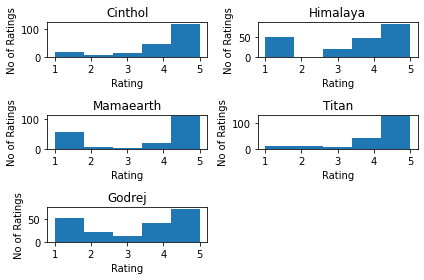

In [4]:
cinthol_rat = product_reviews[product_reviews['brandName']=='Cinthol']
him_rat = product_reviews[product_reviews['brandName']=='Himalaya']
mam_rat = product_reviews[product_reviews['brandName']=='Mamaearth']
tit_rat = product_reviews[product_reviews['brandName']=='Titan']
god_rat = product_reviews[product_reviews['brandName']=='Godrej']

plt.subplot(3,2,1)
plt.hist(cinthol_rat['rating'],bins=5)
plt.title('Cinthol')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')


plt.subplot(3,2,2)
plt.hist(him_rat['rating'],bins=5)
plt.title('Himalaya')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')


plt.subplot(3,2,3)
plt.hist(mam_rat['rating'],bins=5)
plt.title('Mamaearth')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')


plt.subplot(3,2,4)
plt.hist(tit_rat['rating'],bins=5)
plt.title('Titan')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')


plt.subplot(3,2,5)
plt.hist(god_rat['rating'],bins=5)
plt.title('Godrej')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')

plt.tight_layout()
plt.savefig('Top 5 Rating')

# Ratings of the bottom 5 Brands

In [5]:
product_reviews['brandName'].value_counts().tail()

Maggi          20
Coca           20
Glucon         20
NutriChoice    12
Indiana         6
Name: brandName, dtype: int64

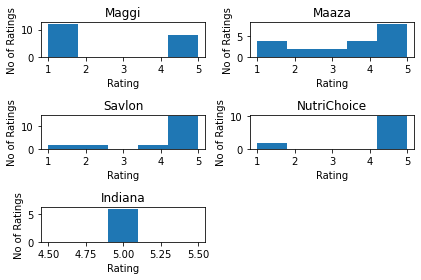

In [6]:
mag_rat = product_reviews[product_reviews['brandName']=='Maggi']
maaz_rat = product_reviews[product_reviews['brandName']=='Maaza']
sav_rat = product_reviews[product_reviews['brandName']=='Savlon']
nutri_rat = product_reviews[product_reviews['brandName']=='NutriChoice']
ind_rat = product_reviews[product_reviews['brandName']=='Indiana']

plt.subplot(3,2,1)
plt.hist(mag_rat['rating'],bins=5)
plt.title('Maggi')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')


plt.subplot(3,2,2)
plt.hist(maaz_rat['rating'],bins=5)
plt.title('Maaza')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')


plt.subplot(3,2,3)
plt.hist(sav_rat['rating'],bins=5)
plt.title('Savlon')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')


plt.subplot(3,2,4)
plt.hist(nutri_rat['rating'],bins=5)
plt.title('NutriChoice')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')


plt.subplot(3,2,5)
plt.hist(ind_rat['rating'],bins=5)
plt.title('Indiana')
plt.xlabel('Rating')
plt.ylabel('No of Ratings')

plt.tight_layout()
plt.show()

# Wordcloud by rating

### 1 star rating Wordcloud

In [7]:
word_1 =  pd.DataFrame(train[train['rating']==1]['review'])
word_1 = word_1.reset_index()
word_1 = word_1.drop(['index'], axis = 1) 
word_1.head()

,review
0,The tea packet was torn . I would like this or...
1,Caused too much pimples on dry and sensitive s...
2,Very very bad product.. Didnt expect this qual...
3,Very bad product worth ZERO star. The entire s...
4,Disappointed with the product. Seals were brok...


In [8]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


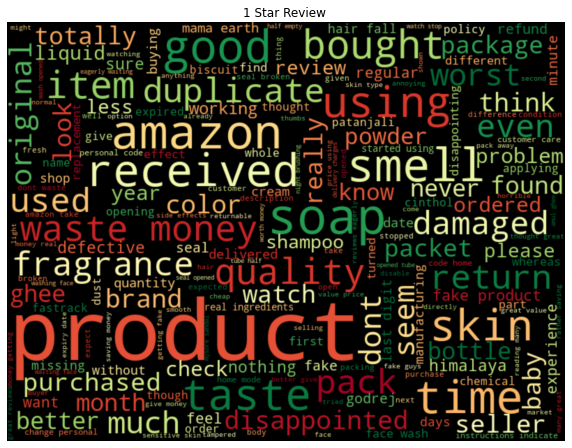

In [9]:
corpus1 = []
for i in range(0,len(word_1)):
    text = re.sub('[^a-zA-Z]', ' ', word_1['review'][i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus1.append(text)
    
word_cloud1 = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(corpus1))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud1, interpolation = 'gaussian')
plt.title('1 Star Review ')
plt.axis('off')
plt.savefig('1 star')

rating1_words = list(word_cloud1.words_.keys())



### 2 star rating wordCloud

In [10]:
word_2 =  pd.DataFrame(train[train['rating']==2]['review'])
word_2 = word_2.reset_index()
word_2 = word_2.drop(['index'], axis = 1) 
word_2.head()

,review
0,The smell is good but the arrmatic spray is no...
1,So I am a big fan of MAMA EARTH products and I...
2,Highly dissatisfied with the product. Received...
3,"Product is good , but the final color is not i..."
4,"Product is good , but the final color is not i..."


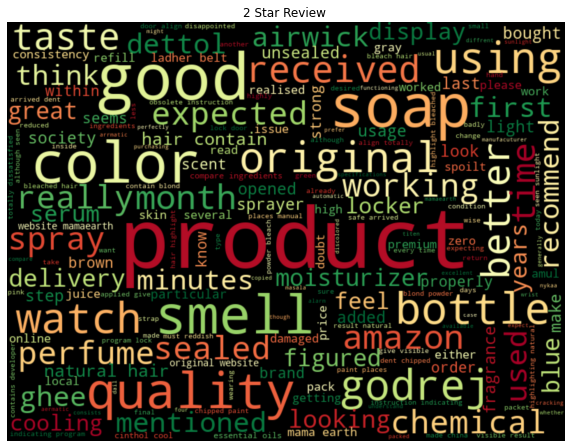

In [11]:
corpus2 = []
for i in range(0,len(word_2)):
    text = re.sub('[^a-zA-Z]', ' ', word_2['review'][i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus2.append(text)
    
word_cloud2 = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(corpus2))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud2, interpolation = 'gaussian')
plt.title('2 Star Review ')
plt.axis('off')
plt.savefig('2 star')

rating2_words = list(word_cloud2.words_.keys())



### 3 star rating Wordcloud

In [12]:
word_3 =  pd.DataFrame(train[train['rating']==3]['review'])
word_3 = word_3.reset_index()
word_3 = word_3.drop(['index'], axis = 1) 
word_3.head()

,review
0,I have orderd two spray bottle and recieved on...
1,"Although, it makes a very rich and creamy lath..."
2,"i Tried wagh bakri, red label, tata agni, veda..."
3,its pricey... 6 packets of bnatural is 120 and...
4,The product is good. But MRP in the packet is ...


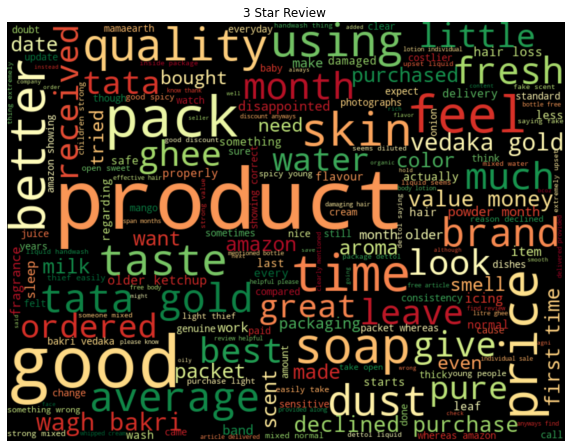

In [13]:
corpus3 = []
for i in range(0,len(word_3)):
    text = re.sub('[^a-zA-Z]', ' ', word_3['review'][i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus3.append(text)
    
word_cloud3 = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(corpus3))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud3, interpolation = 'gaussian')
plt.title('3 Star Review ')
plt.axis('off')
plt.savefig('3 star')

rating3_words = list(word_cloud3.words_.keys())



### 4 star rating Wordcloud

In [14]:
word_4 =  pd.DataFrame(train[train['rating']==4]['review'])
word_4 = word_4.reset_index()
word_4 = word_4.drop(['index'], axis = 1) 
word_4.head()

,review
0,It gives this color on lifting your black hair...
1,It's all perfect except the price per ltr of t...
2,Excellent u r also getting money back
3,I use this gel as my night cream and I am quit...
4,The tea is good. But old stock. Packed on Octo...


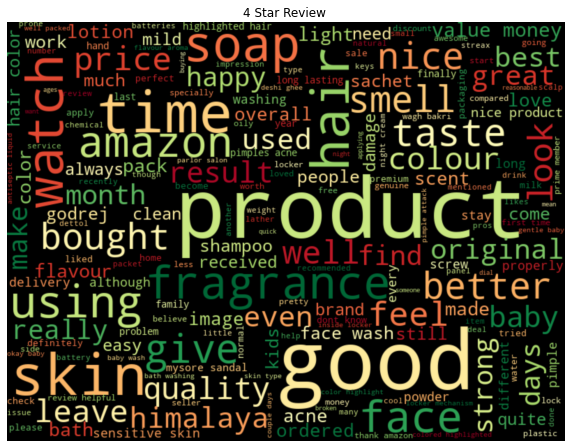

In [15]:
corpus4 = []
for i in range(0,len(word_4)):
    text = re.sub('[^a-zA-Z]', ' ', word_4['review'][i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus4.append(text)
    
word_cloud4 = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(corpus4))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud4, interpolation = 'gaussian')
plt.title('4 Star Review ')
plt.axis('off')
plt.savefig('4 star')

rating4_words = list(word_cloud4.words_.keys())



### 5 star rating wordcloud

In [16]:
word_5 =  pd.DataFrame(train[train['rating']==5]['review'])
word_5 = word_5.reset_index()
word_5 = word_5.drop(['index'], axis = 1) 
word_5.head()

,review
0,Very vibrant colour and fade away after a mont...
1,I JUST LOVED THIS PRODUCT THERE IS NO COMPARIS...
2,"This is original sandal soap,also smell is fan..."
3,Tried this paneer for the first time apprehens...
4,Taste is a matter of preference. Personally sp...


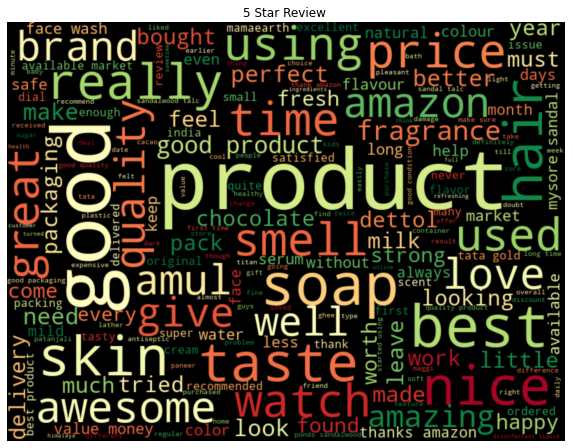

In [17]:
corpus5 = []
for i in range(0,len(word_5)):
    text = re.sub('[^a-zA-Z]', ' ', word_5['review'][i])
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus5.append(text)
    
word_cloud5 = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(corpus5))

plt.figure(figsize = (10, 10))
plt.imshow(word_cloud5, interpolation = 'gaussian')
plt.title('5 Star Review ')
plt.axis('off')
plt.savefig('5 star')

rating5_words = list(word_cloud5.words_.keys())



### Words by Rating

Having words by rating will help us later in creating a base model to predict rating based on reviews.

For the ease of training purpose we will combine the 4 star and 5 star rating words. 1 star, 2 star and 3 star together

In [18]:
rating123 = []
rating123.append(rating1_words)
rating123.append(rating2_words)
rating123.append(rating3_words)

In [19]:
rating45 = []
rating45.append(rating4_words)
rating45.append(rating5_words)

In [20]:
print(len(rating1_words))
print(len(rating2_words))
print(len(rating3_words))
print(len(rating4_words))
print(len(rating5_words))


200
200
200
200
200


In [21]:

list3 = set(rating1_words)&set(rating2_words)&set(rating3_words)&set(rating4_words)&set(rating5_words)

common_words = sorted(list3, key = lambda k : rating1_words.index(k))

In [22]:
print(common_words)

['product', 'soap', 'amazon', 'smell', 'time', 'good', 'received', 'skin', 'taste', 'using', 'bought', 'quality', 'pack', 'fragrance', 'brand', 'color', 'look', 'watch', 'better', 'month', 'less', 'feel', 'though']


In [23]:
with open("file.txt", 'w') as f:
    for s in common_words:
        f.write(str(s) + '\n')